<a href="https://colab.research.google.com/github/ketanksagar/kNN_Algorithm/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color="cyan">Unsupervised Learning:<font>**
---
* Unsupervised learning finds patterns in data
* E.g. clustering customers by their purchases
* Compressing the data using purchase patterns (dimension reduction)

### Supervised vs Unsupervised Learning:
* Supervised learning finds patterns for a prediction task
* E.g. classify tumors as benign or cancerous (labels)
* Unsupervised learning finds patterns in data. (without labels)
* ... but without a specific prediction task in mind

In [ ]:
def get_species():
    target = load_iris()['target']
    species = []
    for i in target:
        if i == 0:
            species.append('setosa')
        elif i == 1:
            species.append('versicolor')
        else:
            species.append('virginica')
    return species

In [ ]:
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
samples = load_iris()
samples = samples['data']

In [ ]:
# K-means clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(samples)

KMeans(n_clusters=3)

In [ ]:
labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### Cluster Label for new samples:
* New samples can be assigned to existing clusters
* k-means remembers the mean of each cluster (the "centroids")
* finds the nearest centroid to each new sample.

#### Visualization:

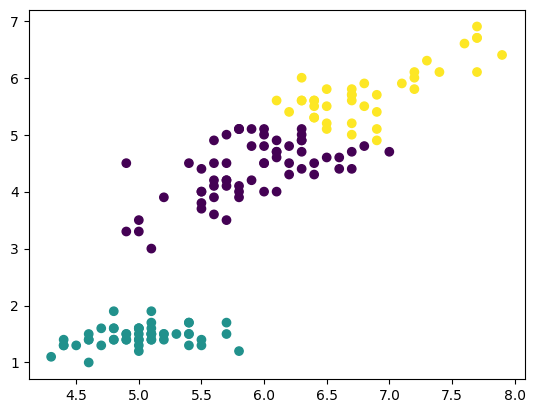

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
xs = samples[:, 0]
ys = samples[:, 2]
plt.scatter(xs, ys, c = labels)
plt.show()

### Evaluating a clustering
* Can check correspondence with e.g. iris species
* ... but what if there are no species to check against?
* Measure quality of a clustering
* Informs choice of how many clusters to look for

In [ ]:
# Correspondence:[Cross tabulation in pandas]
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': get_species()})
print(df)

     labels    species
0         1     setosa
1         1     setosa
2         1     setosa
3         1     setosa
4         1     setosa
..      ...        ...
145       2  virginica
146       0  virginica
147       2  virginica
148       2  virginica
149       0  virginica

[150 rows x 2 columns]


In [ ]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          48         14
1            50           0          0
2             0           2         36


#### Measuring Clustering quality (Inertia)
* Using only samples and their cluster labels
* A good clustering has tight clusters
* Samples in each cluster bunched together

#### Interia measures centering quality:
* Measures how spread out the clusters are (lower is better)
* Distance from each sample to centroid of its cluster

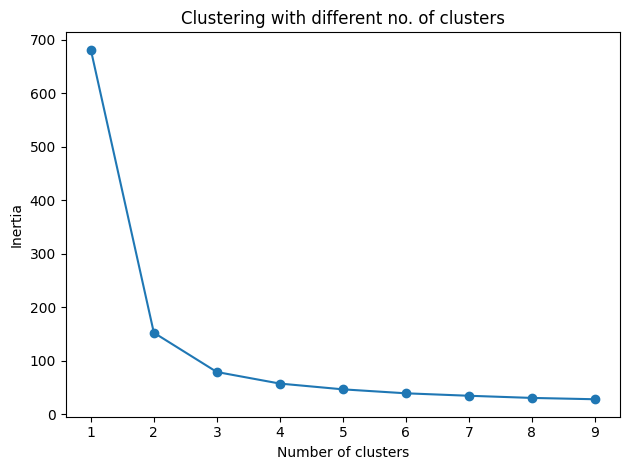

In [ ]:
# Intertia vs cluster number plot:
inertias = []
for i in range(1, 10):
    model = KMeans(n_clusters = i)
    model.fit(samples)
    inertias.append(model.inertia_)
plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title('Clustering with different no. of clusters')
plt.tight_layout()
plt.show()

* A good cluster has low inerta
* But it also does'nt have too many clusters.
* **A good rule is to choose and ELBOW in the plot**

### Transforming features for bettwe clustering:
upload the wine data in the file.[sample datasets]

In [ ]:
df = pd.read_csv('sample_data/wine.csv')
samples = df.drop('Wine', axis = 1).values
wine = df['Wine'].values
wine_names = []
for i in wine:
    if i == 1:
        wine_names.append('barolo')
    elif i == 2:
        wine_names.append('grinolino')
    else:
        wine_names.append('barbera')

In [ ]:
model_1 = KMeans(n_clusters = 3)
labels = model_1.fit_predict(samples)

In [ ]:
frame = pd.DataFrame({'labels': labels, 'varieties': wine_names})
ct = pd.crosstab(frame['labels'], frame['varieties'])
print(ct)

varieties  barbera  barolo  grinolino
labels                               
0               29      13         20
1                0      46          1
2               19       0         50


In [ ]:
# Feature Variances:
print(df.var())

Wine                        0.600679
Alcohol                     0.659062
Malic.acid                  1.248015
Ash                         0.075265
Acl                        11.152686
Mg                        203.989335
Phenols                     0.391690
Flavanoids                  0.997719
Nonflavanoid.phenols        0.015489
Proanth                     0.327595
Color.int                   5.374449
Hue                         0.052245
OD                          0.504086
Proline                 99166.717355
dtype: float64


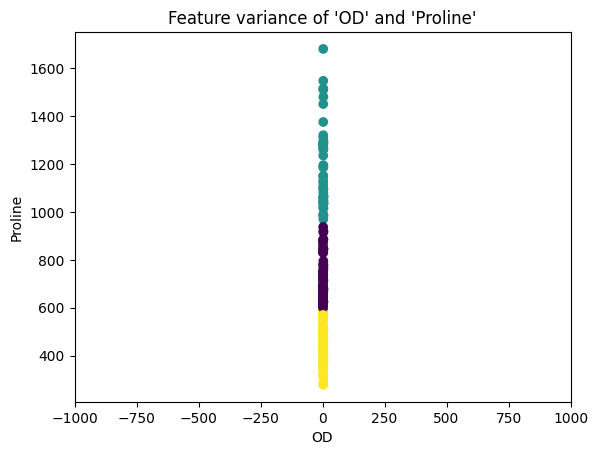

In [ ]:
# scatter plot of proline and OD
plt.scatter(df['OD'].values, df['Proline'].values, c = labels)
plt.xlabel('OD')
plt.ylabel('Proline')
plt.title('Feature variance of \'OD\' and \'Proline\'')
plt.xlim([-1000, 1000])
plt.show()

#### Feature Scaling:
There are several feaure scaling methods available:
* `StandardScaler`
* `MinMaxScaler`
* `RobustScalar`
* `Normalizer`

***
1. **`StandardScalar`:**
> If each feature is normally distributed then it'll make the feature normally distributed around 0 (i.e. make the mean 0) and dtandard deviation 1.
**Formula:**
$$\frac{x_{i} - x_{mean}}{x_{std}}$$

> *NOTE:* **<font color="red">If the data is not normally distributed then its is not the suitable preprocessing process to use.</font>**

In [ ]:
# Visualize with code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
plt.style.use('ggplot')

In [ ]:
# making the datasets.
df = pd.DataFrame({
    'x1': np.random.normal(0, 1, 1000),
    'x2': np.random.normal(3, 5, 1000),
    'x3': np.random.normal(-5, 5, 1000)
})

scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = ['x1', 'x2', 'x3'])

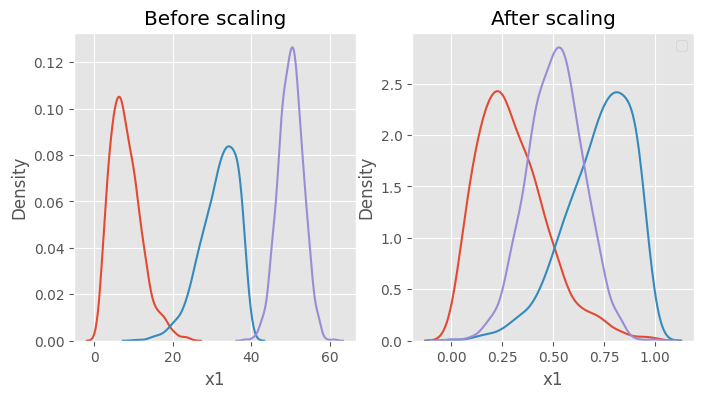

In [ ]:
# Visualizing the data
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(8,4))
ax1.set_title("Before scaling")
sns.kdeplot(df['x1'], ax = ax1)
sns.kdeplot(df['x2'], ax = ax1)
sns.kdeplot(df['x3'], ax = ax1)
ax2.set_title('After scaling')
sns.kdeplot(scaled_df['x1'], ax = ax2)
sns.kdeplot(scaled_df['x2'], ax = ax2)
sns.kdeplot(scaled_df['x3'], ax = ax2)
plt.show()

***
2. **`MinMaxScaler`:**
> It is most popular scaling algorithm. It shrinks the range of the data between 0 and 1 or -1 and 1 (incase there is negative data). If the distribution of the features are not gaussian disrtibution and the standard deviation is small then the algorithm works better
**Formula**
$$\frac{x_{i} - x_{min}}{x_{max}-x_{mean}}$$

> *NOTE:* **<font color="red">But this alogorithm is sensitive to outliers, if the data contains outliers then one should consider the `RobustScaler` method </font>**

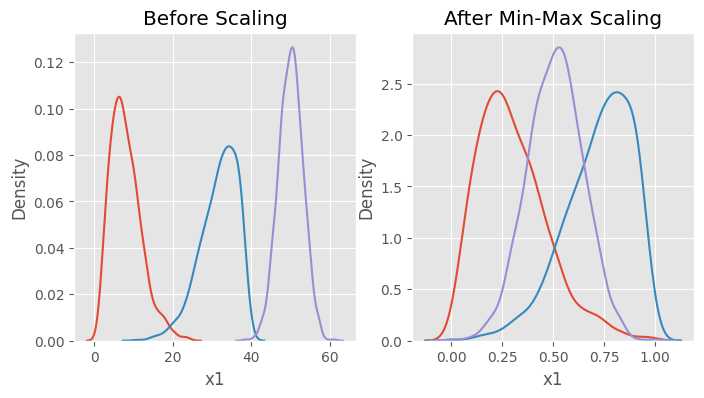

In [ ]:
# Minmax Scaler visualization:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Further Reading about <font color="orange">Chisqure</font>: https://g.co/bard/share/149fcd07eba2 \
Further Reading about <font color="orange">Beta</font>: https://g.co/bard/share/149fcd07eba2

3. **`RobustScaler`:**
> `RobustScaler` uses the same method as `MinMaxScaler` but instead of taking maximum and minimum value it takes an interquartile maximum and minimum so that it is immune to outliers.
**Formula:**
$$\frac{x_{i} - Q_{max}(x)}{Q_{max}(x) - Q_{min}(x)}$$
> The whole data is divided in the 4 equal division. so there are 3 quartile. $Q_{max}(x) = Q_3{x}$ and $Q_{min}(x) = Q_{1}(x)$

> <font color="limered">That means it uses less of the data for scaling. It us suitable for the case when the data has more outliers.<font>

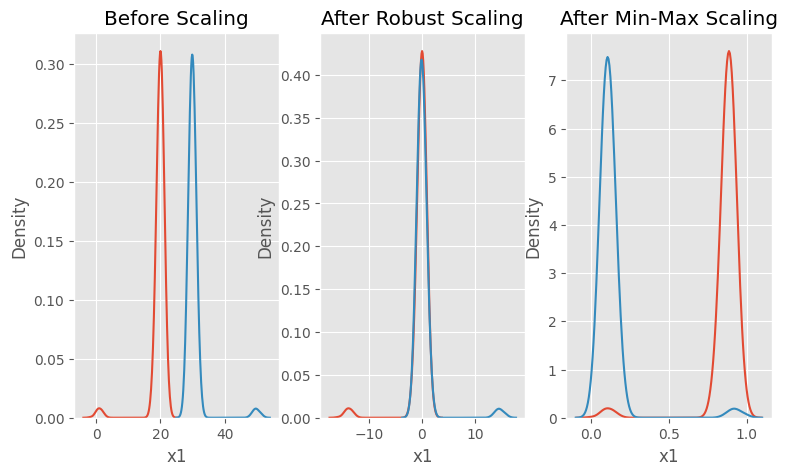

In [ ]:
# Robust scaler visualization
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

> Notice that after Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.
>
> However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.

***
4. **`Normalizer`:**
> The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:
<font color = "red">$$\frac{x_i}{\sqrt{x_{i}^2+y_{i}^2+z_{i}^2}}$$</font>

> Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

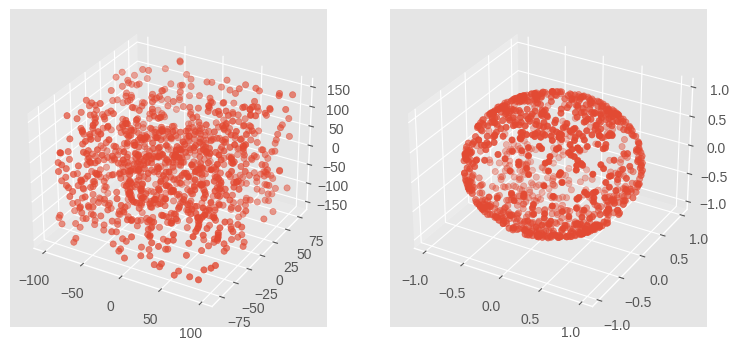

In [ ]:
# Normalizer visualization:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.style.use('seaborn-v0_8-dark')
plt.show()